<ipython-input-3-b374cc285217>:43: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(ax, image1, image2, keypoints1, keypoints2, matches)


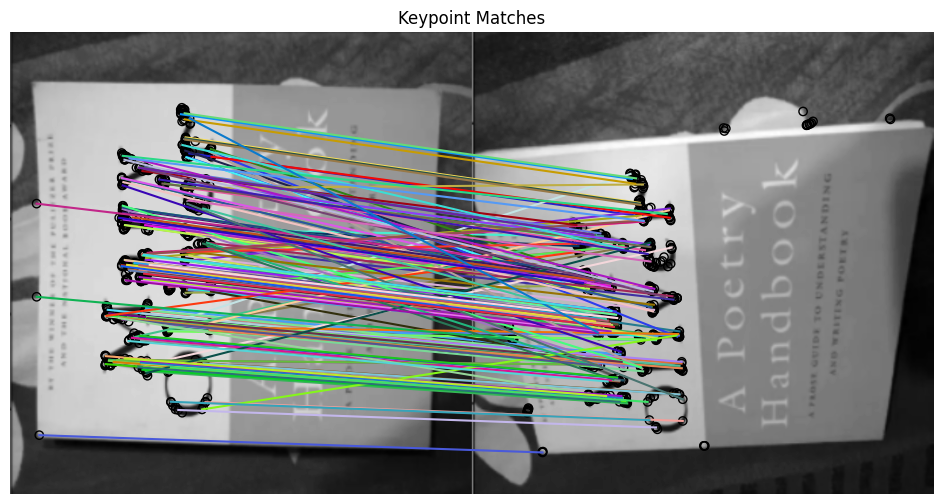

Number of matches: 195


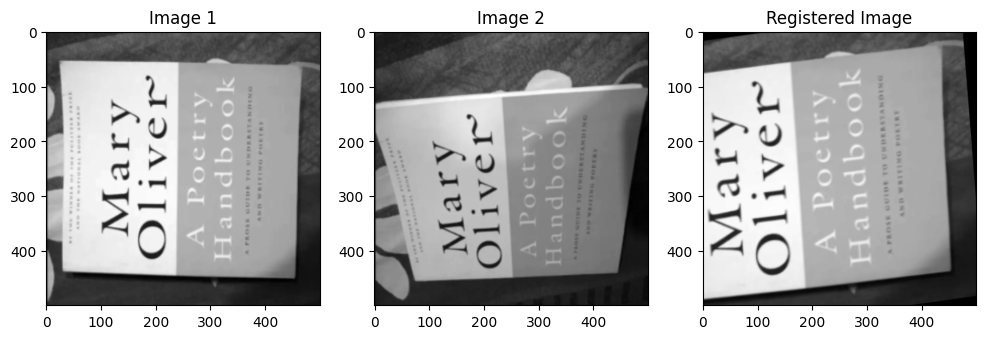

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import ORB, match_descriptors, plot_matches
from skimage.transform import AffineTransform, warp, resize
from skimage.measure import ransac

# Load images
image1 = cv2.imread('/content/image 1.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/image 2.png', cv2.IMREAD_GRAYSCALE)

# Check if images are loaded
if image1 is None or image2 is None:
    raise ValueError("One or both images failed to load. Check the file paths.")

# Resize images to be the same size
image1 = resize(image1, (500, 500), anti_aliasing=True)
image2 = resize(image2, (500, 500), anti_aliasing=True)

# Initialize ORB detector
orb = ORB(n_keypoints=500)

# Detect features and descriptors
orb.detect_and_extract(image1)
keypoints1 = orb.keypoints
descriptors1 = orb.descriptors

orb.detect_and_extract(image2)
keypoints2 = orb.keypoints
descriptors2 = orb.descriptors

# Match descriptors
matches = match_descriptors(descriptors1, descriptors2, cross_check=True)

# Extract matched keypoints
src = keypoints1[matches[:, 0]]
dst = keypoints2[matches[:, 1]]

# Plot keypoints and matches
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.gray()

plot_matches(ax, image1, image2, keypoints1, keypoints2, matches)
ax.axis('off')
ax.set_title("Keypoint Matches")
plt.show()

# Verify number of matches
print(f"Number of matches: {len(matches)}")

# Check if we have enough matches to compute a reliable transformation
if len(matches) < 4:
    raise ValueError("Not enough matches to compute a reliable transformation")

# Compute affine transformation using RANSAC for robustness
model_robust, inliers = ransac((dst, src),
                               AffineTransform, min_samples=4,
                               residual_threshold=2, max_trials=1000)

# Warp image
registered_image = warp(image1, model_robust.inverse, output_shape=image2.shape)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Image 1')
plt.imshow(image1, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Image 2')
plt.imshow(image2, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Registered Image')
plt.imshow(registered_image, cmap='gray')

plt.show()
